In [27]:
# Read pdf pages 85:95 and convert them into text
library(pdftools)
readpage<- pdf_convert('M:\\Imarticus\\ProjectR\\Text mining\\Datafiles\\vsosports.pdf',
                       pages=85:95)
text<- tesseract::ocr(readpage)

Converting page 85 to vsosports_85.png... done!
Converting page 86 to vsosports_86.png... done!
Converting page 87 to vsosports_87.png... done!
Converting page 88 to vsosports_88.png... done!
Converting page 89 to vsosports_89.png... done!
Converting page 90 to vsosports_90.png... done!
Converting page 91 to vsosports_91.png... done!
Converting page 92 to vsosports_92.png... done!
Converting page 93 to vsosports_93.png... done!
Converting page 94 to vsosports_94.png... done!
Converting page 95 to vsosports_95.png... done!


In [28]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library(tidytext)
library(dplyr)
data(stop_words)

In [29]:
# clean text using stringr
library(stringr)
# Remove alphanumeric characters & punctuation
textnew<- str_replace_all(text, "[[:punct:]]", " ")
textnew<-str_replace_all(textnew, "[^[:alnum:]]", " ")


In [30]:
var <- Corpus(VectorSource(textnew))

# Convert the text to lower case
var <- tm_map(var, content_transformer(tolower))
# Remove numbers
var <- tm_map(var, removeNumbers)
# Remove english common stopwords
var <- tm_map(var, removeWords, stopwords("english"))
# Remove your own stop word
var <- tm_map(var, removeWords,c("ofthe","ine","bal","forthe","tomake",
                                 "eam","andthe","fom","immediately","anthe",
                                 "fora","tine","ines","tothe")) 
# Eliminate extra white spaces
var <- tm_map(var, stripWhitespace)

Warning message in tm_map.SimpleCorpus(var, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, c("ofthe", "ine", "bal", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, stripWhitespace):
"transformation drops documents"

In [31]:
dtm <- TermDocumentMatrix(var)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )
table <- table %>% anti_join(stop_words)


Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [32]:
#top 50 words
top50_words<-head(table,50)
top50_words

word,freq
ball,30
player,23
team,22
games,17
players,16
students,16
activity,15
line,13
net,13
equipment,10


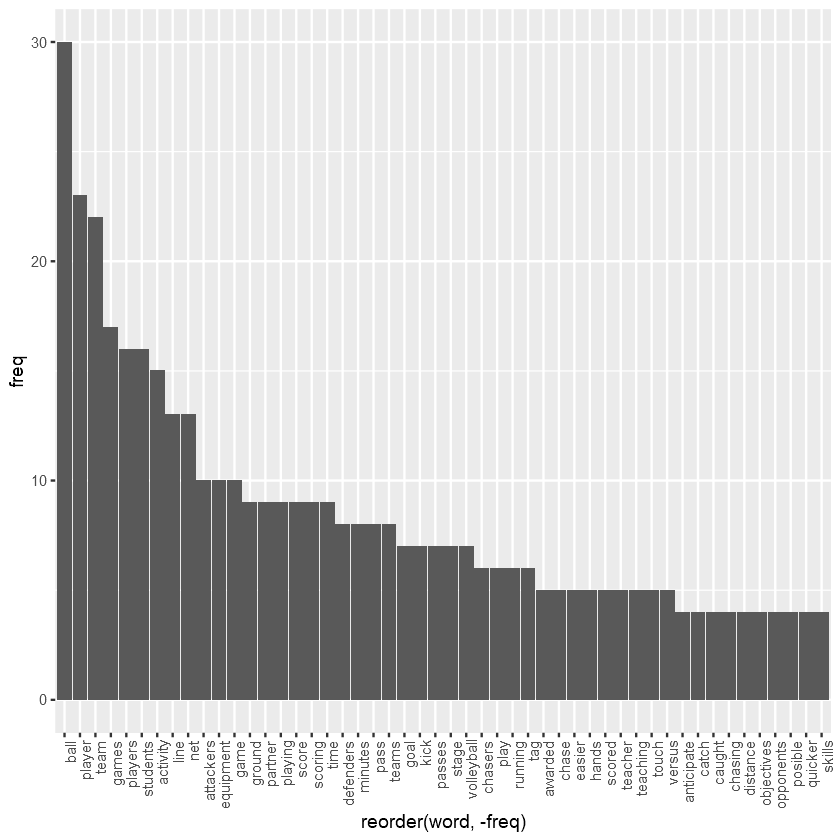

In [33]:
#word frequency plot
library(ggplot2)
ggplot(top50_words, aes(x= reorder(word, -freq), y = freq)) +
  geom_bar(stat = "identity")+ 
 theme(axis.text.x=element_text(angle=90, hjust=1))

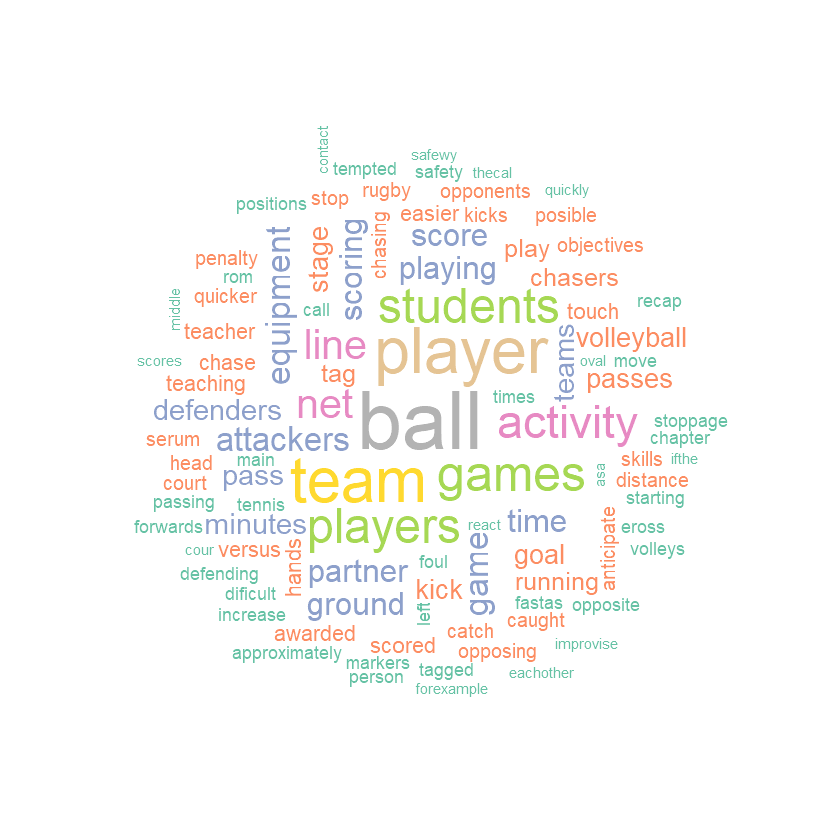

In [34]:
#wordcloud
set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=100, random.order=FALSE, 
          colors=brewer.pal(8, "Set2"))

In [35]:
top25_words<-head(table,25)

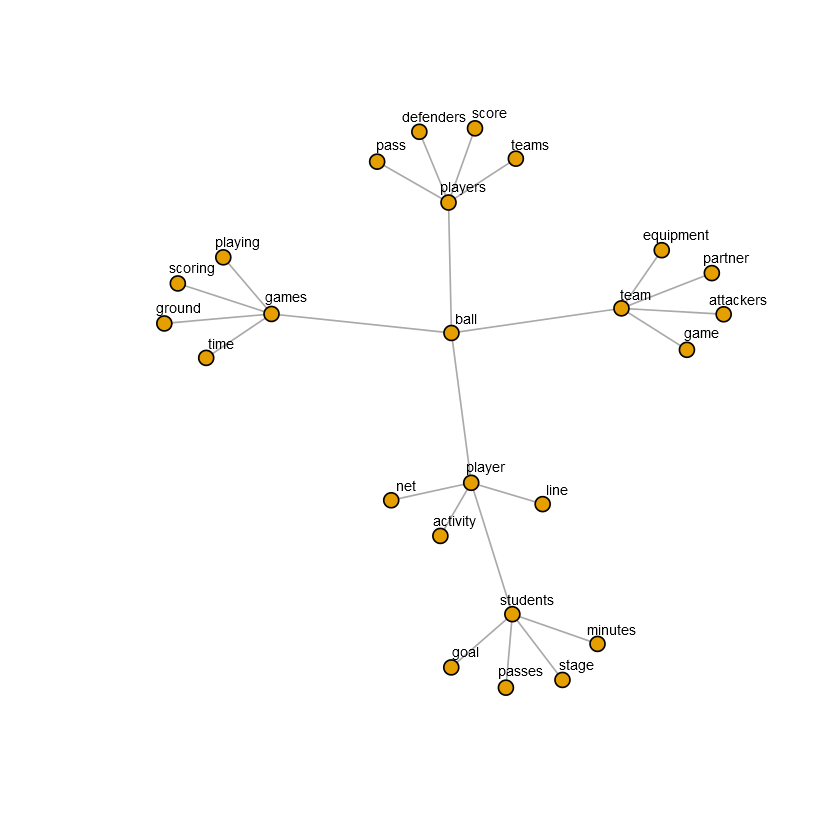

In [36]:
#Tree plot
library(igraph)
tr <- make_tree(25, children =4, mode = "undirected")

plot(tr, vertex.size=5, vertex.label=top25_words$word,
     vertex.label.dist=1,vertex.label.color="black", vertex.label.cex=0.7) 

In [37]:
net_graph=data.frame(head(table,50))
net_graph=net_graph[10:35,]
net_graph

,word,freq
10,equipment,10
11,attackers,10
12,game,10
13,partner,9
14,playing,9
15,time,9
16,scoring,9
17,ground,9
18,score,9
19,pass,8


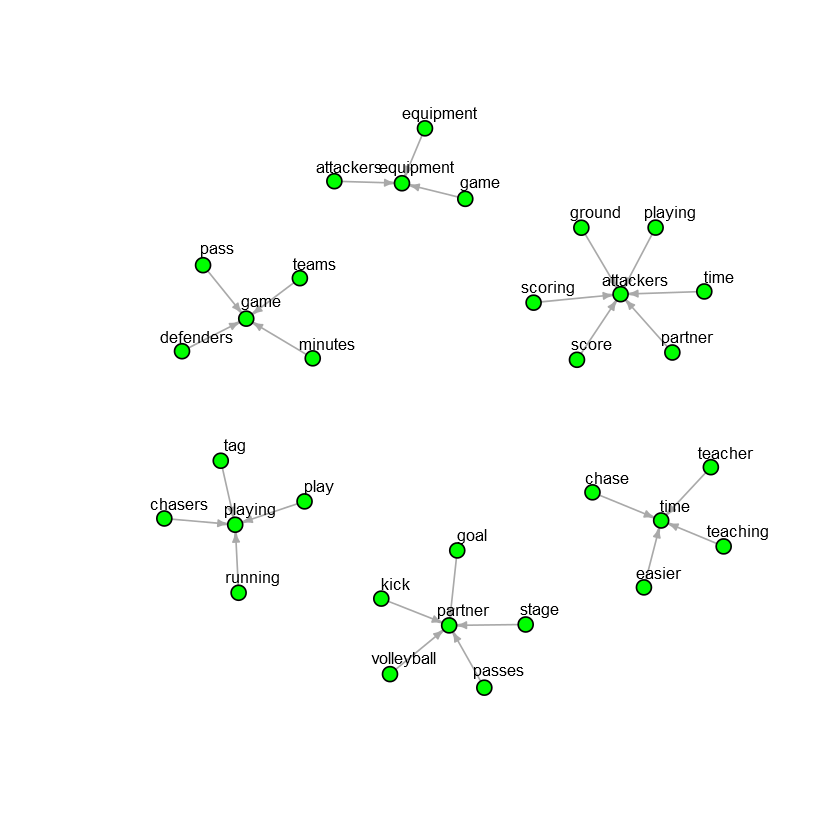

In [38]:
#network plot
net <- graph_from_data_frame(d=net_graph, directed=T)
#plot(net)
plot(net, edge.arrow.size=.4,vertex.label=net_graph$word,
    vertex.label.dist=1,vertex.label.dist=1,vertex.size=5,edge.arrow.size=.7, 
    vertex.color="green",vertex.frame.color="black", vertex.label.color="black",
    vertex.label.cex=0.8)